In [135]:
import pandas as pd

df = pd.read_csv('titanic/train.csv')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
df_copy = df.copy()

In [138]:
cond1 = df_copy['Sex'] == 'female'
cond2 = df_copy['Sex'] == 'male'

df_copy.loc[cond1, 'Age'] = df_copy.loc[cond1, 'Age'].fillna(df_copy.loc[cond1, 'Age'].mean())
df_copy.loc[cond2, 'Age'] = df_copy.loc[cond2, 'Age'].fillna(df_copy.loc[cond2, 'Age'].mean())
df = df_copy


In [139]:
df = pd.get_dummies(df, columns=['Sex'], dtype=int)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [140]:
data = df[['PassengerId', 'Pclass', 'Sex_female', 'Age', 'SibSp', 'Parch', 'Fare']] 
target = df[['Survived']]

In [141]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [142]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_female       0
Sex_male         0
dtype: int64

In [143]:
knr.score(test_input, test_target)

-0.05550774526678137

In [144]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
lr.score(test_input, test_target)


0.4018883535297222

In [166]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)
test_poly = poly.transform(test_input)

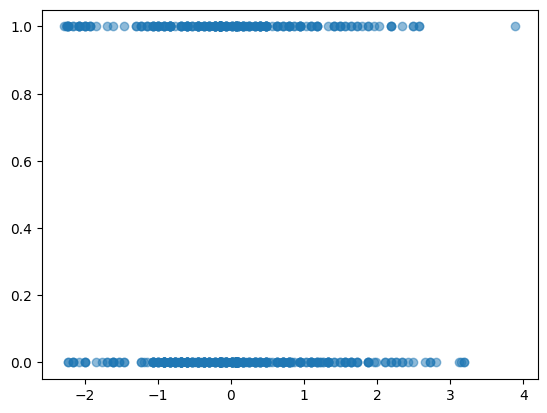

In [168]:
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
age_index = list(data.columns).index('Age')  # 'Age' 열의 인덱스 찾기
train_age_scaled = train_scaled[:, age_index]  # 해당 열만 선택

import matplotlib.pyplot as plt
# 산점도 그리기
plt.scatter(train_age_scaled, train_target, alpha=0.5)

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(train_scaled, train_target)
rf.score(test_scaled, test_target)

C:\Users\1-16\Desktop\DAMF22\ML\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.852017937219731